In [3]:
import pandas as pd

df = pd.read_csv('Code_Complaints_and_Violations.csv')

print(df.head())

     RecordNum RecordType RecordTypeMapped   RecordTypeDesc  \
0  001001-03CP  Complaint          Request     Construction   
1  001002-03CP  Complaint          Request     Construction   
2  001003-03CP  Complaint          Request  Vacant Building   
3  001004-03CP  Complaint          Request         Land Use   
4  001005-03CP  Complaint          Request         Land Use   

                                         Description    OpenDate  \
0  Elevator gets stuck at least 3 times a week, f...  2003-11-10   
1  Concerned about RV pumpout that is currently b...  2003-11-10   
2  The vacant red apple building and adjacent bui...  2003-11-10   
3  Trailor and camper parked in back yard.  Peopl...  2003-11-10   
4  Illegal use of property."Hawkers" or vendors (...  2003-11-10   

                        LastInspDate LastInspResult StatusCurrent  \
0  POINT (-122.33582172 47.60642293)      Completed     Completed   
1  POINT (-122.35191884 47.68639169)      Completed     Completed   
2  PO

In [4]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 188130
Number of columns: 17


Complaint              137119
Notice of Violation     28459
Citation                18597
Tenant Relocation        3639
Unfit Building            316
Name: RecordType, dtype: int64


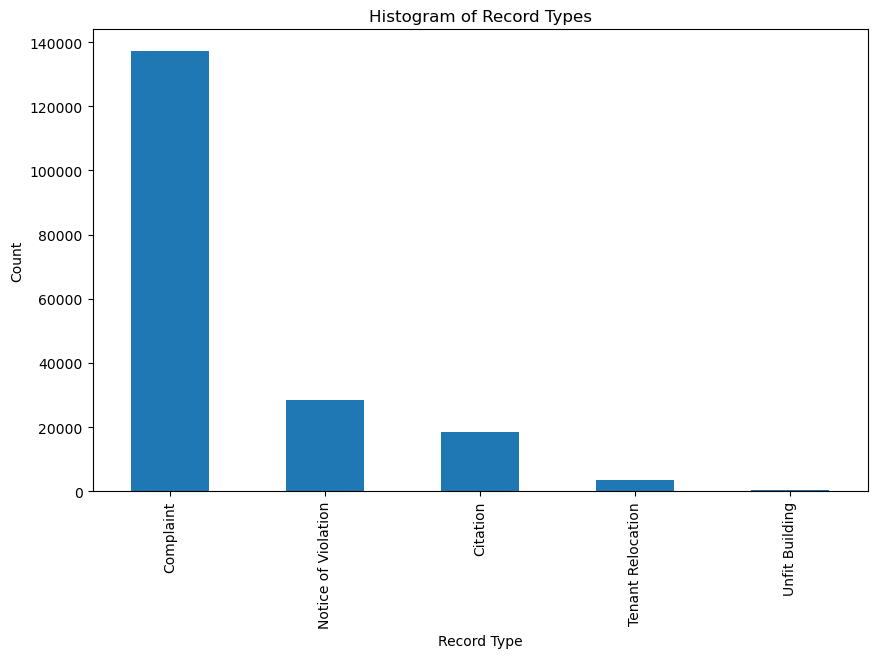


Category: Complaint
0    Elevator gets stuck at least 3 times a week, f...
1    Concerned about RV pumpout that is currently b...
2    The vacant red apple building and adjacent bui...
3    Trailor and camper parked in back yard.  Peopl...
4    Illegal use of property."Hawkers" or vendors (...
Name: Description, dtype: object

Category: Notice of Violation
462                                                  NaN
463    Someone living in camper in northeast corner o...
464    Work w/o permit.Windows being replaced on the ...
465    Observed while re-inspecting adjacent property...
467    Caller states that adjacent property is being ...
Name: Description, dtype: object

Category: Unfit Building
466     FIRE DAMAGED HOUSE- OWNER IS APPLYING FOR UNFI...
610                     Burned out single family building
4750              Three unit condo damamged by 1996 slide
4768                        zoning junk storage violation
4887                          unfit building and premises
Name: 

In [5]:
#2.1
import matplotlib.pyplot as plt

category_counts = df['RecordType'].value_counts()

print(category_counts)


plt.figure(figsize=(10,6))
category_counts.plot(kind='bar')
plt.title('Histogram of Record Types')
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.show()


for category in df['RecordType'].unique():
    print(f"\nCategory: {category}")
    print(df[df['RecordType'] == category]['Description'].head())


In [6]:
#2.2
new_df = df[['RecordType', 'OriginalZip', 'Description']]


In [7]:
#2.3
zipcode_df = new_df[new_df['OriginalZip'] == '98112']

record_counts = zipcode_df['RecordType'].value_counts()
record_proportions = zipcode_df['RecordType'].value_counts(normalize=True)

print(record_counts)
print(record_proportions)

seattle_record_proportions = df['RecordType'].value_counts(normalize=True)

print(seattle_record_proportions)

for category in zipcode_df['RecordType'].unique():
    print(f"Category: {category}")
    print(zipcode_df[zipcode_df['RecordType'] == category]['Description'].head())


Series([], Name: RecordType, dtype: int64)
Series([], Name: RecordType, dtype: float64)
Complaint              0.728852
Notice of Violation    0.151273
Citation               0.098852
Tenant Relocation      0.019343
Unfit Building         0.001680
Name: RecordType, dtype: float64


In [8]:
#2.4
new_df.to_csv('three_column_dataset.tsv', sep='\t', index=False)


In [14]:

#3.1
df['OpenDate'] = pd.to_datetime(df['OpenDate'])

df.set_index('OpenDate', inplace=True)

timeseries = pd.Series(df['OriginalZip'].values, index=df.index)


KeyError: 'OpenDate'

<Axes: xlabel='OpenDate'>

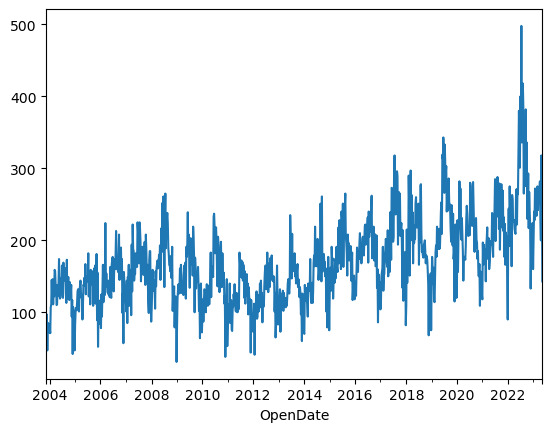

In [10]:
complaints_per_week = timeseries.resample('W').count()

complaints_per_week.plot()


In [16]:

#Question: What is the most common complaint type in the 'OriginalZip' of 98105?

df_98105 = df[df['OriginalZip'] == '98105']

record_counts_98105 = df_98105['RecordType'].value_counts()

if not record_counts_98105.empty:
    most_common_complaint_98105 = record_counts_98105.idxmax()
    print("The most common type of complaint in zip code 98105 is: ", most_common_complaint_98105)
else:
    print("No data available for zip code 98105.")

No data available for zip code 98105.


In [12]:
print(df.columns)


Index(['RecordNum', 'RecordType', 'RecordTypeMapped', 'RecordTypeDesc',
       'Description', 'LastInspDate', 'LastInspResult', 'StatusCurrent',
       'OriginalAddress1', 'OriginalCity', 'OriginalState', 'OriginalZip',
       'Link', 'Latitude', 'Longitude', 'Location1'],
      dtype='object')
